# Machine Learning Test on DREaM Corpora

This notebook is going to be a training ground for my machine learning skills (skillz?) and a testing ground for how to best handle travel writing. The current corpus is drawn from DREaM.

I have two corpuses hand-built (terminology?) by me. Both are limited by the years 1650-1700. 

The first, which we'll call "travel", consists of 78 texts that are focused on physical travel, primarily outside Britain but some within. I excluded any texts regarding metaphysical travel (a lot of early modernists used the metaphor of travel to talk about going to God) and where travel was a subset of a larger text. 

The second, which we'll call "nontravel" (but with Other in the file name and as indicated below), consists of 78 texts that are distinctly not travel. These consist of texts from disciplines like law, philosophy, natural science, scandalous tales, parliament decrees, and sermons.

In both of these corpora, I tried to not include any texts that seemed to fall into a "grey zone," so to speak. Therefore, I didn't include geography in either category. Similarly, I was unsure of where to put Pilgrim's Progress. I am very interested to see what happens with these texts - where will they be classified, in the end?

As a basis, I am drawing largely from the [Classifying Philosophical Texts](https://github.com/htrc/ACS-TT/blob/master/tools/notebooks/ClassifyingPhilosophicalText.ipynb) notebook. 

So, let's experiment, shall we?

First, as noted in the CPT notebook, it's useful to take a look at what are documents look like. For this example, we'll look at document similarly using relative frequencies. The code below produces two visualizations for document similarity: 
- a dendrogram that shows a cluster hierarchy of documents
- a colour-coded scatterplot that shows the multidimensional term frequencies matrix in a 2D space (suggesting clusters)

Note that we're using relative frequencies rather than TF-IDF. TF-IDF is better at indicating the significance of the term frequency withint eh corpus, but it scales less well for dynamic and large corpora since we need to know in advance how many documents contain a given term.

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import ward, dendrogram
%matplotlib inline

# plot the documents from the corpus
def plot_corpus_similarity(corpus, vectorizer):
    
    # generate the vector, distances and positions
    texts = [corpus.raw(fileid) for fileid in corpus.fileids()]
    documentTermMatrix = vectorizer.fit_transform(texts)
    distances = 1 - cosine_similarity(documentTermMatrix)
    mds = MDS(dissimilarity="precomputed", random_state=1)
    positions = mds.fit_transform(distances)
    
    # plot dendrogram
    linkage_matrix = ward(distances)
    plt.figure(figsize=(8,10))
    dendrogram(linkage_matrix, labels=corpus.fileids(), orientation="right");
    plt.show()  # fixes margins
    
    # plot scatter
    xvalues = positions[:, 0] 
    yvalues = positions[: ,1] 
    plt.figure(figsize=(20,10))
    for x, y, name in zip(xvalues, yvalues, corpus.fileids()):
        plt.scatter(x, y)
        # the colour-coding here is a bit of a hard-coded hack for what is otherwise mostly reusable code
        plt.text(x, y, name.replace(".txt", "")[:25], color='red' if 'Other' in name else 'green')
    plt.show()

### Simple Document Similarities
We'll being by loading our corpus into an NLTK corpus for convenience.

In [5]:
import nltk
from nltk.corpus.reader.plaintext import PlaintextCorpusReader

data_dir = "C:/Users/broomgrass/iPython/Dream/data/texts"
corpus = PlaintextCorpusReader(data_dir+"/testcorpus", ".*\.txt") 
# the testcorpus folder has the travel and nontravel texts together, with Other in the filename designating nontravel

Now that we have a corpus, we can try out the functions above by sending our entire corpus with a simple tokenizer that doesn't include stopwords or keywords to keep. Notice that we use a [TF-IDF vectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) but we tell the vectorizer to not compute the document frequencies (use_idf=False) which simply normalizes (relativizes) the term frequencies by document.

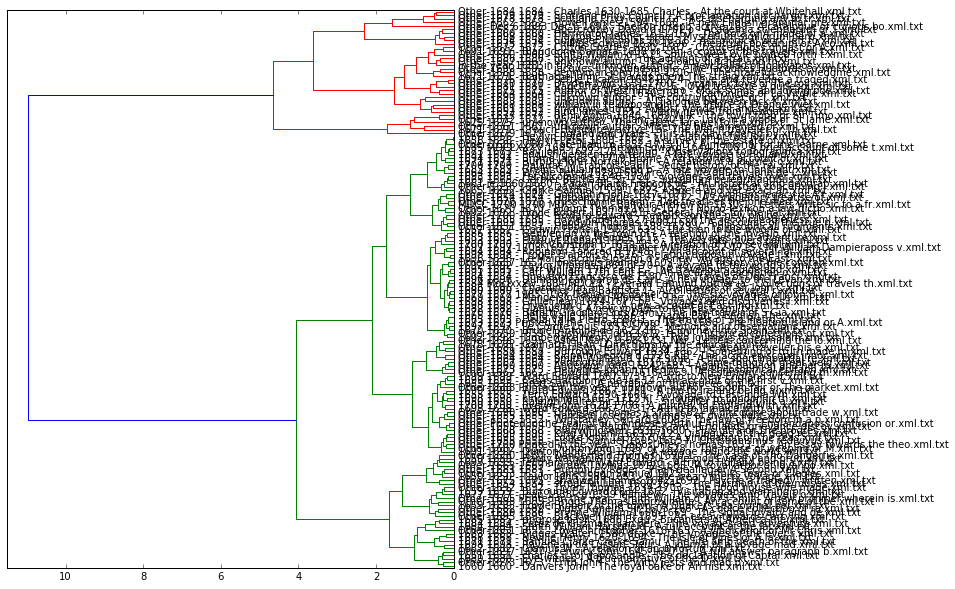

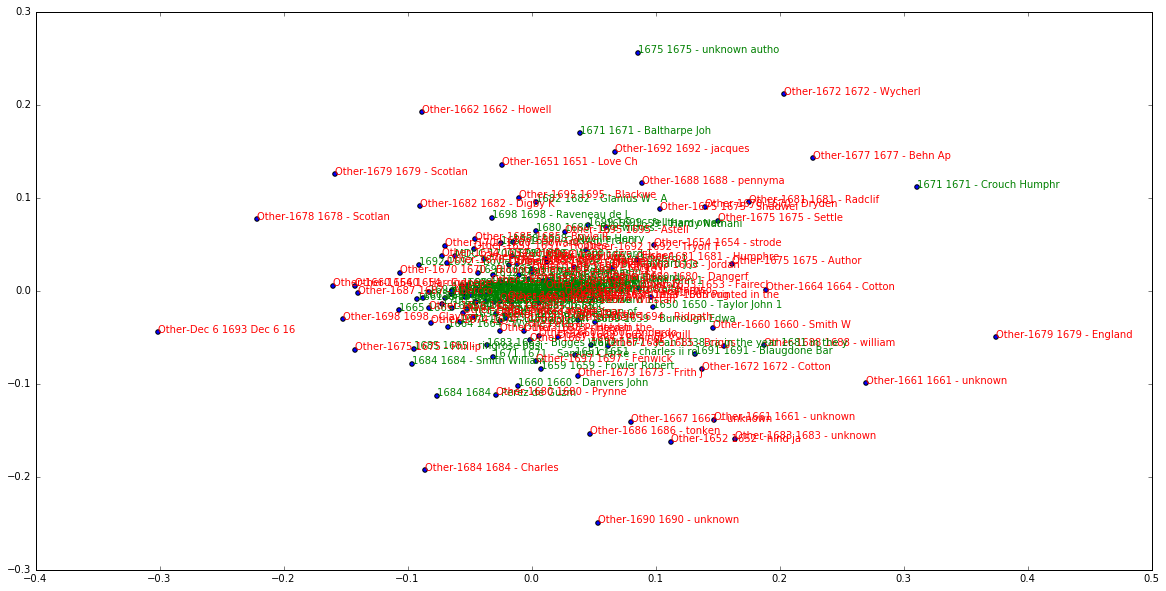

In [6]:
simple_vectorizer = TfidfVectorizer(use_idf=False)
plot_corpus_similarity(corpus, simple_vectorizer)

Well, it worked! From the bottom graph, it looks like the travel are more densely connected than the nontravel, which is what I expected. The outliers for travel is a 1675 ballad about the Quaker's voyage to North America, Baltharpe's 1671 poem *THE Straights Voyage, OR, St. Dadids Poem: BEING A DESCRIPTION OF The most Remarkable Passages that happened in her first Expedition against the Turkes of Argeir* and Humphrey's 1671 poem *The Welch Traveller: OR, The Unfortunate WELCHMAN*. Upon a closer review, the latter is more of a humourous/satiric poem about the Welsh, so if I was to refine my corpus, I might remove it. I'm interested that these outliers are all poems/lyrical in some fashion - I'm not sure if others in the corpus are poetic as well, but I do recall reading that most 18thC travel literature was in prose, so I wouldn't be surprised for the pattern to be the same in the early modern.

The texts in the dendrogram are grouped or split up (I wish I could read them more clearly!). And in the scatterplot, there is a great deal of overlap. It's more than I expected, but I'm interested to see if stopwords will help.

Well, continuing onward, let's refine using English stopwords – this will remove common function words from the relative term frequencies matrix. We'll also limit the number of terms considered to 5,000 for further efficiency.

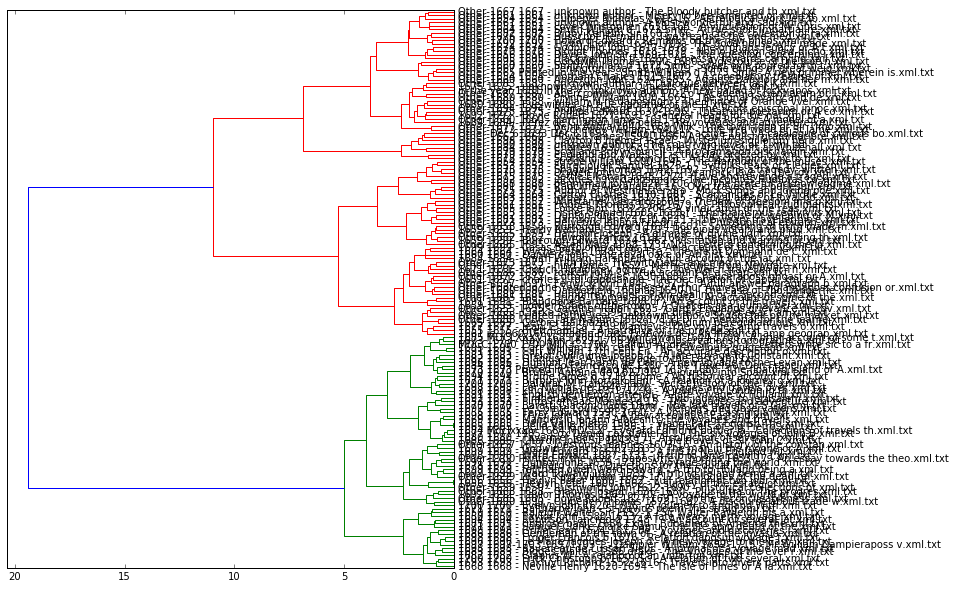

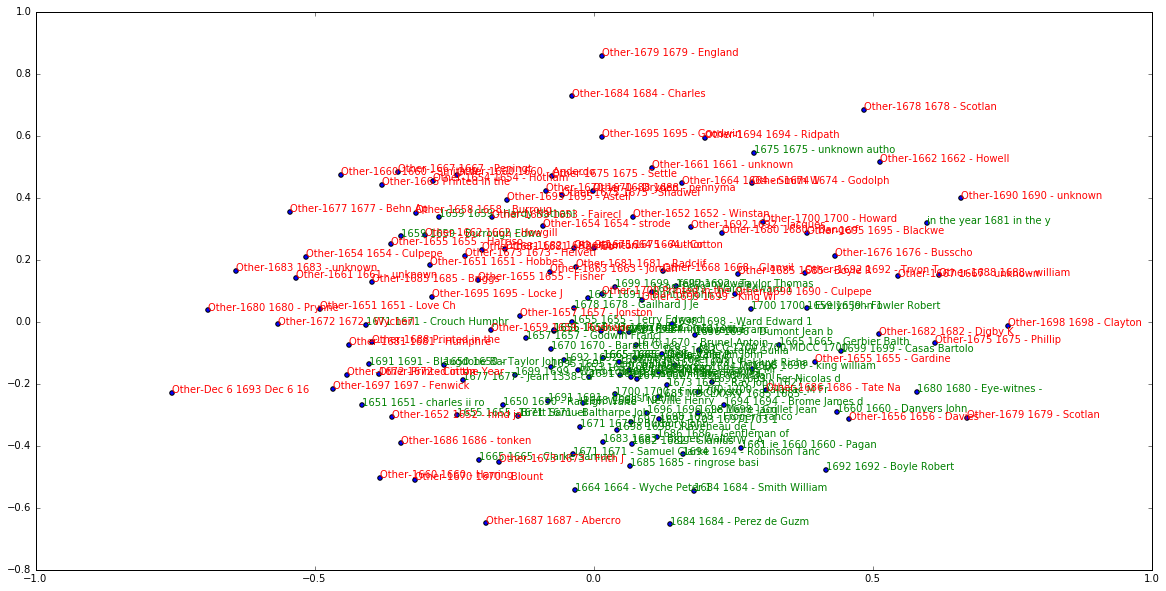

In [8]:
stoplist_vectorizer = TfidfVectorizer(use_idf=False, stop_words=nltk.corpus.stopwords.words("english"), max_features=5000)
plot_corpus_similarity(corpus, stoplist_vectorizer)

Ah, this certainly looks more fine-tuned, with travel grouping more in comparison to the other texts. There are still a few outliers - for example, the  "in the year 1681" is another ballad, *A NEW BALLAD OF Jocky's Iourney into England, in the Year, 1681.* I'm not sure whether it is better to cull some of the outliers - the 1659 Hardy Nathanial text, for example, is *THE PIOUS VOTARY AND PRUDENT TRAVELLER: CHARACTERIZED In a Farewell-SERMON, occasioned by the voyage of Nathanael Wych Esq. President to the East-Indies.* Do I want to define it as travel literature, or not? 

Additionally, something else to watch for in the future is what variable to use for "red", since certain texts could have "other" in the title.
   

#### Playing with variables

I want to know how changing certain variables may change the output.

For example, what if I change the number of features to something much lower? Let's say, 2500 instead of 5000?


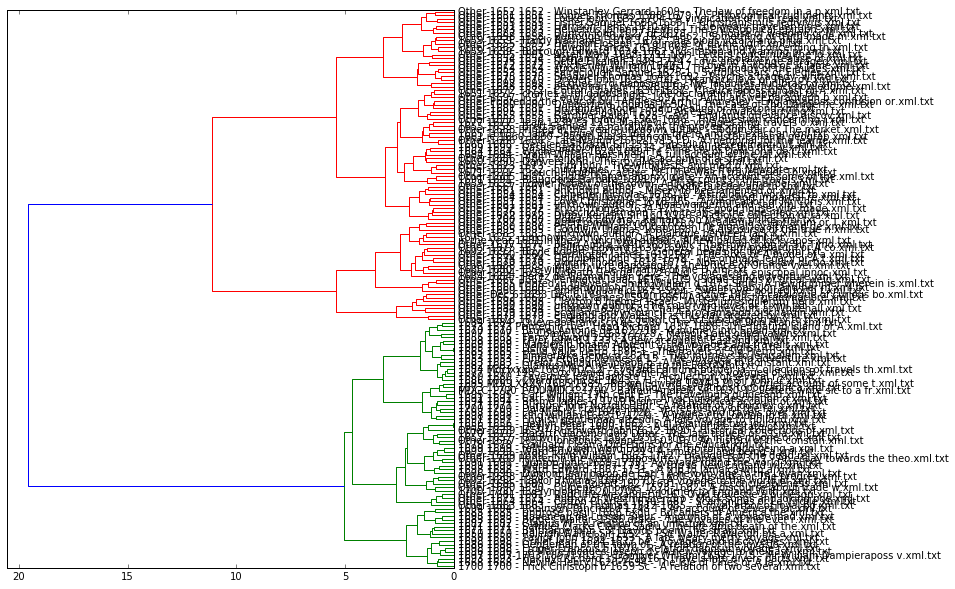

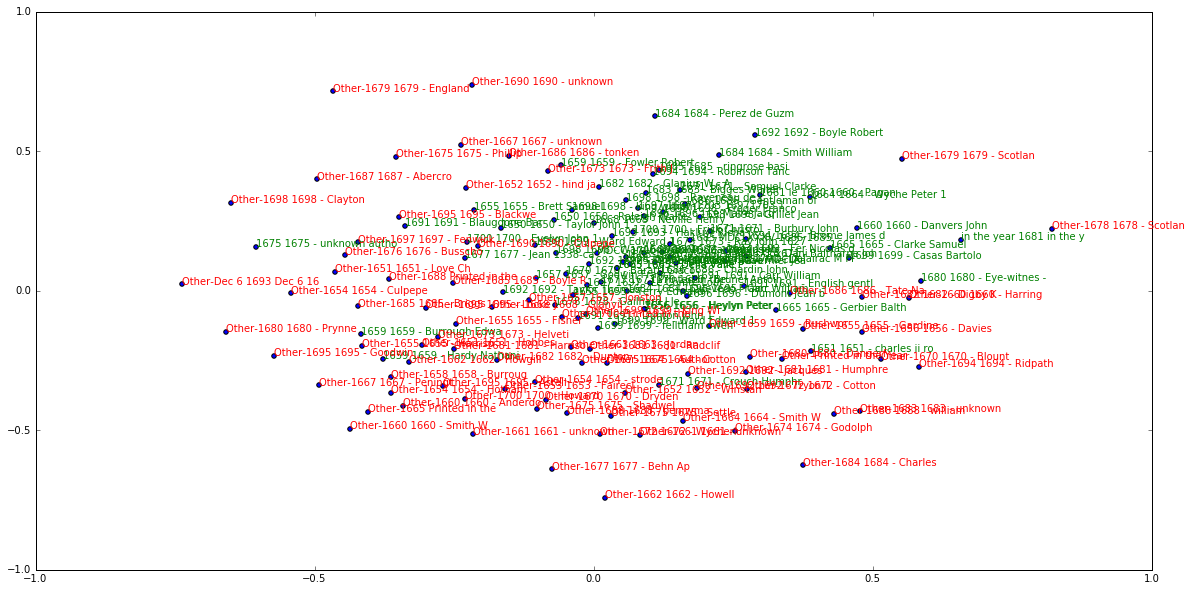

In [7]:
stoplist_vectorizer = TfidfVectorizer(use_idf=False, stop_words=nltk.corpus.stopwords.words("english"), max_features=2500)
plot_corpus_similarity(corpus, stoplist_vectorizer)

What about if we increase the max features to 7500?

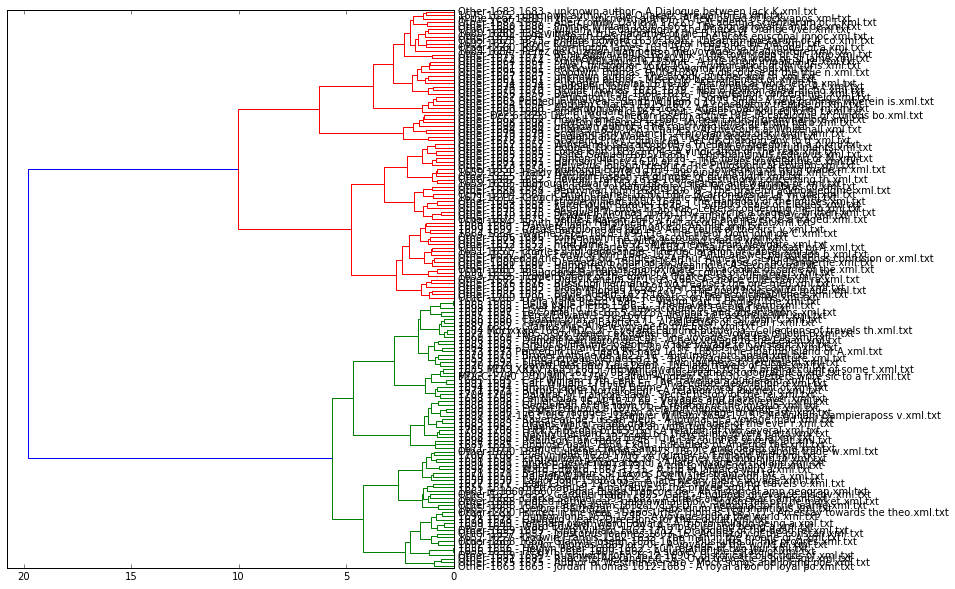

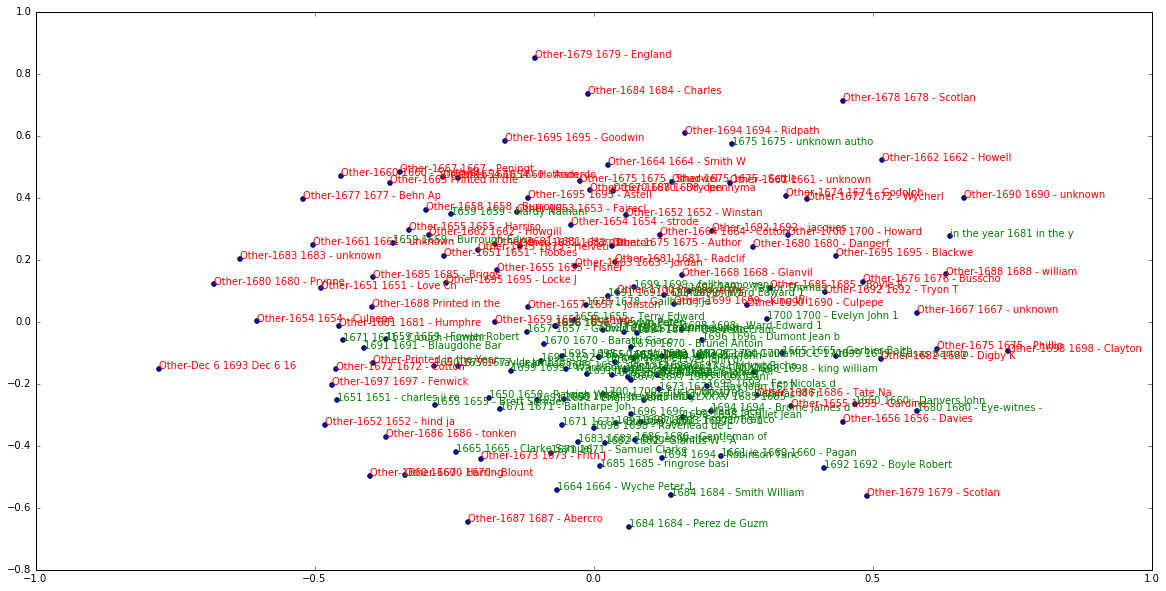

In [8]:
stoplist_vectorizer = TfidfVectorizer(use_idf=False, stop_words=nltk.corpus.stopwords.words("english"), max_features=7500)
plot_corpus_similarity(corpus, stoplist_vectorizer)

It's certainly more spread out than the other two. I suppose that increasing the max features, that makes sense because travel lit would only have a limited vocabulary that isn't shared with others.

Crazy thought: what if we go very, very tiny?

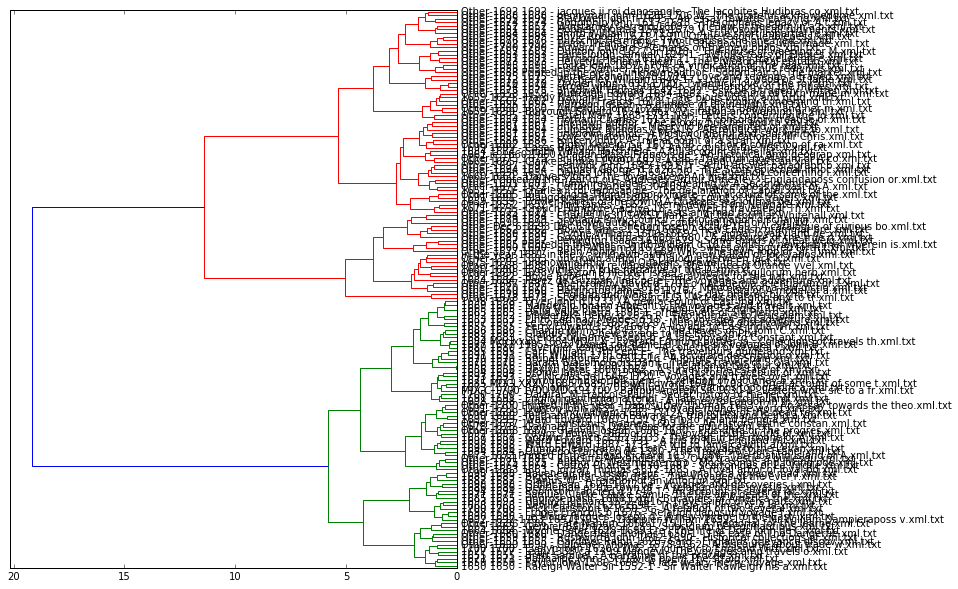

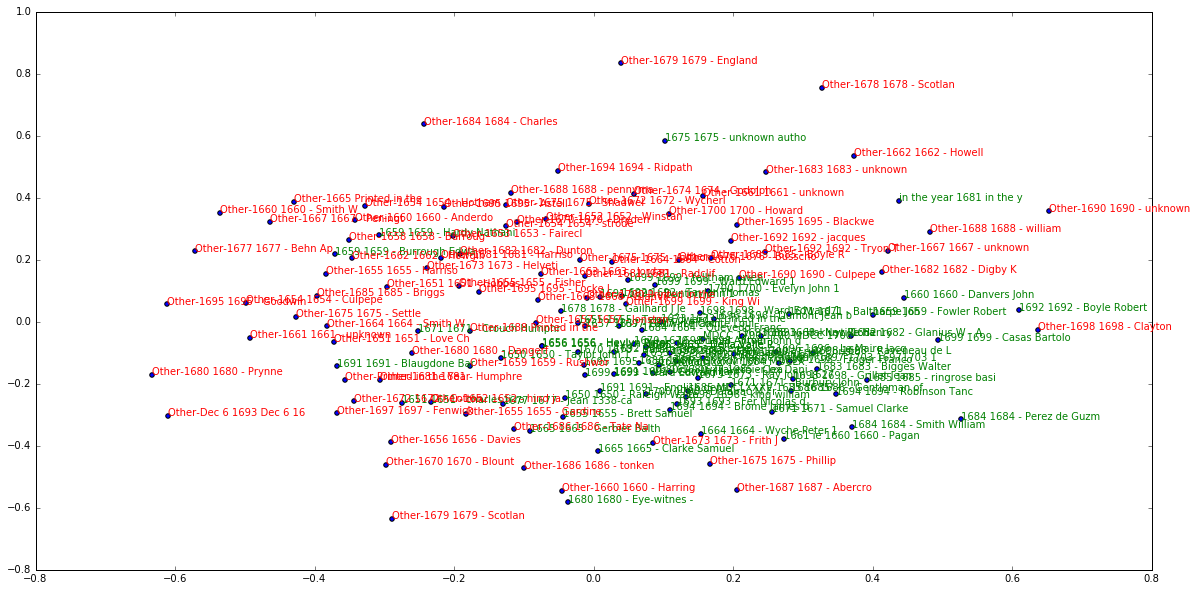

In [7]:
stoplist_vectorizer = TfidfVectorizer(use_idf=False, stop_words=nltk.corpus.stopwords.words("english"), max_features=500)
plot_corpus_similarity(corpus, stoplist_vectorizer)

After looking at all these experiments, I actually think the 5000 feature set works the best. It's not as clear from looking at the scatterplot (perhaps because the titles distort the actual pattern - I might see very different texts to cut if the text went from right to left, for example), but the dendrogram for the 5000 feature set appears to be the most grouped.

So, when I'm working to narrow down my corpus, I will probably work with the 5000 feature set.

### But what about TF-IDF?

Earlier, we noted that we aren't using TF-IDF, because "it scales less well for dynamic and large corpora since we need to know in advance how many documents contain a given term."

But, out of curiousity, can we give TF-IDF a test run?

In [10]:
stoplist_vectorizer = TfidfVectorizer(stop_words=nltk.corpus.stopwords.words("english"), max_features=5000) 
# removed the use_idf=False
plot_corpus_similarity(corpus, stoplist_vectorizer)

Still similarly grouped, which is good, I suppose? But I don't exactly know how TF-IDF is interacting with my corpus, especially considering the above caveat. TF-IDF, conceptually, seems like it is more powerful (or more accurate? terminology?) than just relative frequency, but is limited by needing to know how many documents contain the term. This may be something to discuss with Stefan! 

In the CPT notebook, they run the same process with a keyword list. I'd be interested to see how that works on the corpus, but I don't have a keyword list prepared - dang! Easiest way to populate one might be to run over the travel corpus looking for word frequencies and maybe topics?

Until then, let's reflect on this process:

### observations and questions following document similarity

- how important is it to have a really concise corpus? That is, is it better to trim outliers like in the examples above?

- Answer: At this point, I feel confident that I have a corpus I can work with. I still have mixed feelings about cutting some of the texts, but I will move them and see if they get drawn back in. Additionally, I can always run the notebook again using other versions of the corpora to see if things change compared to other notebooks.

- is it too much to include poetry, prose, and plays? Or will focusing on one genre lead to better results? It's limiting my focus a bit, but that has both bad and good aspects.

## next steps: trimming the corpus

As I've mentioned, I have mixed feelings about refining my corpus. Part of the goal of this endeavour is to see whether things that might not be considered "travel literature" are drawn in by the machine learning, and to find noncanonical or unexamined texts. 

However, I think having a more accurate corpus is importnant, at least for an initial run-through. I am going to cut a few of the outliers and put them back into a general corpus - maybe they will be drawn back into the corpus later?

I assume it depends on the kind of machine learning whether relative frequencies are used or other things? Something to lookinto as I get more into reading ML materials.

Until then, I'm off to refine my corpus...

## Supervised Classification

I have my refined corpus! I removed 7 texts (and kept 2), and may remove more depending on what the below reveals. Let's take a look at it.

In [13]:
import nltk
from nltk.corpus.reader.plaintext import PlaintextCorpusReader

data_dir = "C:/Users/broomgrass/iPython/Dream/data/texts"
corpus2 = PlaintextCorpusReader(data_dir+"/modcorpus", ".*\.txt") 
# the testcorpus folder has the travel and nontravel texts together, with Other in the filename designating nontravel

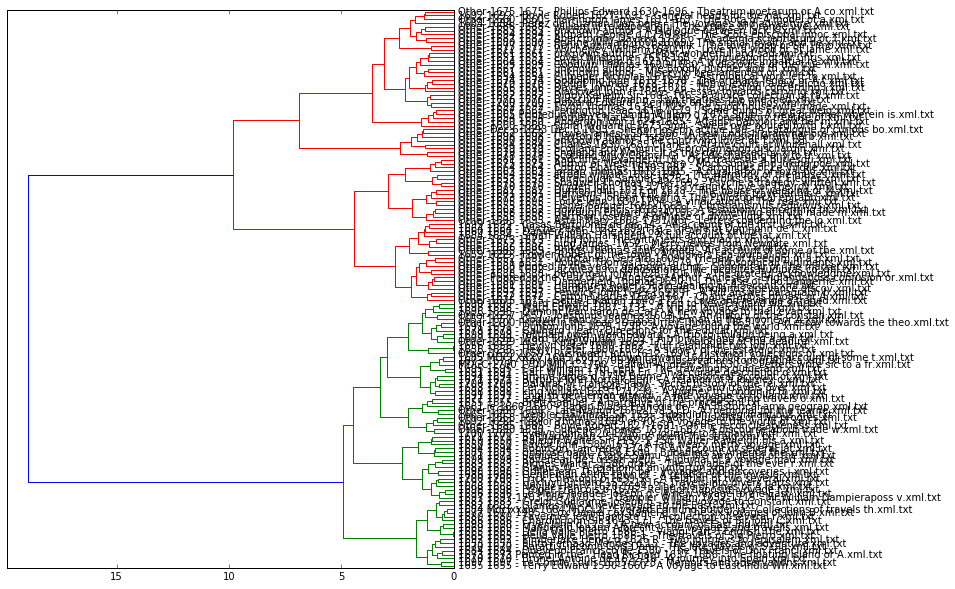

In [14]:
stoplist_vectorizer = TfidfVectorizer(use_idf=False, stop_words=nltk.corpus.stopwords.words("english"), max_features=5000)
plot_corpus_similarity(corpus2, stoplist_vectorizer)

Looks much cleaner! Let's see if I can throw it through a Supervised Classification, drawn (once again) from the Classifying Philosophical Texts notebook.


Supervised classification is essentially a process where we help the computer understand how known items (like texts) are classified in a training set, and then the computer tries to help us by classifying items it hasn't seen before. To determine the accuracy of a classifier, we can use a subset of our known items for training purposes and then test against another subset of our known items to see how many are correctly classified.

### Comparing Classifiers
In our case we have a total of known 147 texts, 69 of which are travel (not explicitly labelled as such) Question - should  there be equal numbers for training? and 78 of which are labelled as "Other". We can load all of our texts, randomized the order, and use half for training and half for testing (this ratio is maybe a bit unconventional because we have so few texts in our corpus, typically people use more of an 80/20 split between training and test sets).

There are many classifiers available and each one has parameters that can be tweaked. Which classifier and which parameters to use depend a lot on the data, the saying goes, but that's not very useful for us if we're just wanting to pick up a classifier and choose some settings. So let's begin by creating an algorithm to compare the accuracy of the classifiers.

Given a set of texts, we will:
shuffle the order randomly
choose half as training data and the other half as test data
create, train and test 13 classifiers (vaguely based on this example)
repeat this process a specified number of times (5 by default)
compare and graph the accuracy of each classifier by looking at the average accuracy for the number of repetitions

In [9]:
import random
from pandas import DataFrame
from collections import defaultdict
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid

def benchmark_svms(labelled_texts, runs, vectorizer):
    results = defaultdict(list)
    split = int(len(labelled_texts)/2)
    for i in range(0, runs):
        random.shuffle(labelled_texts)
        train_set, test_set = labelled_texts[split:], labelled_texts[:split]
        train_set_categories = ["Other" if "Other" in category else "Travel" for category, text in train_set]
        test_set_categories = ["Other" if "Other" in category else "Travel" for category, text in test_set]
        X_train = vectorizer.fit_transform([text for category, text in train_set])
        X_test = vectorizer.transform([text for category, text in test_set])

        for clf, name in (
                (RidgeClassifier(tol=1e-2, solver="lsqr"), "Ridge Classifier"),
                (Perceptron(n_iter=50), "Perceptron"),
                (PassiveAggressiveClassifier(n_iter=50), "Passive-Aggressive"),
                (KNeighborsClassifier(n_neighbors=10), "kNN"),
                (LinearSVC(), "LinearSVC"),
                (LinearSVC(loss='l2', penalty="l2", dual=False, tol=1e-3), "LinearSCV l2"),
                (LinearSVC(loss='l2', penalty="l1", dual=False, tol=1e-3), "LinearSCV l1"),
                (SGDClassifier(alpha=.0001, n_iter=50, penalty="l2"), "SGD l2"),
                (SGDClassifier(alpha=.0001, n_iter=50, penalty="l1"), "SGD l1"),
                (SGDClassifier(alpha=.0001, n_iter=50, penalty="elasticnet"), "SGD elasticnet"),
                (NearestCentroid(), "NearestCentroid (aka Rocchio classifier"),
                (MultinomialNB(alpha=.01), "Naïve Bayes Multinomial"),
                (BernoulliNB(alpha=.01), "Naïve Bayes Bernoulli")):
            clf.fit(X_train, train_set_categories)
            pred = clf.predict(X_test)
            results[name].append(clf.score(X_test, test_set_categories))
    orderedresults = [(name, values) for name, values in results.items()] 
    results_df = DataFrame([values for name,values in orderedresults], index=[name for name,values in orderedresults])
    print("Ordered averages:")
    print(results_df.mean(axis=1).order(ascending=False))
    results_df.transpose().plot(figsize=(20, 10))

C:\Users\broomgrass\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:299: UserWarning: In Ridge, only 'sag' solver can currently fit the intercept when X is sparse. Solver has been automatically changed into 'sag'.
  warnings.warn("In Ridge, only 'sag' solver can currently fit the "
C:\Users\broomgrass\Anaconda3\lib\site-packages\sklearn\svm\classes.py:197: DeprecationWarning: loss='l2' has been deprecated in favor of loss='squared_hinge' as of 0.16. Backward compatibility for the loss='l2' will be removed in 1.0
  DeprecationWarning)
C:\Users\broomgrass\Anaconda3\lib\site-packages\sklearn\svm\classes.py:197: DeprecationWarning: loss='l2' has been deprecated in favor of loss='squared_hinge' as of 0.16. Backward compatibility for the loss='l2' will be removed in 1.0
  DeprecationWarning)
C:\Users\broomgrass\Anaconda3\lib\site-packages\sklearn\svm\classes.py:197: DeprecationWarning: loss='l2' has been deprecated in favor of loss='squared_hinge' as of 0.16. Backward compatibility

Ordered averages:
NearestCentroid (aka Rocchio classifier    0.879487
LinearSCV l2                               0.869231
LinearSVC                                  0.869231
Ridge Classifier                           0.861538
SGD l2                                     0.853846
Naïve Bayes Multinomial                    0.848718
LinearSCV l1                               0.841026
SGD elasticnet                             0.833333
Passive-Aggressive                         0.828205
Perceptron                                 0.817949
SGD l1                                     0.815385
Naïve Bayes Bernoulli                      0.689744
kNN                                        0.666667
dtype: float64


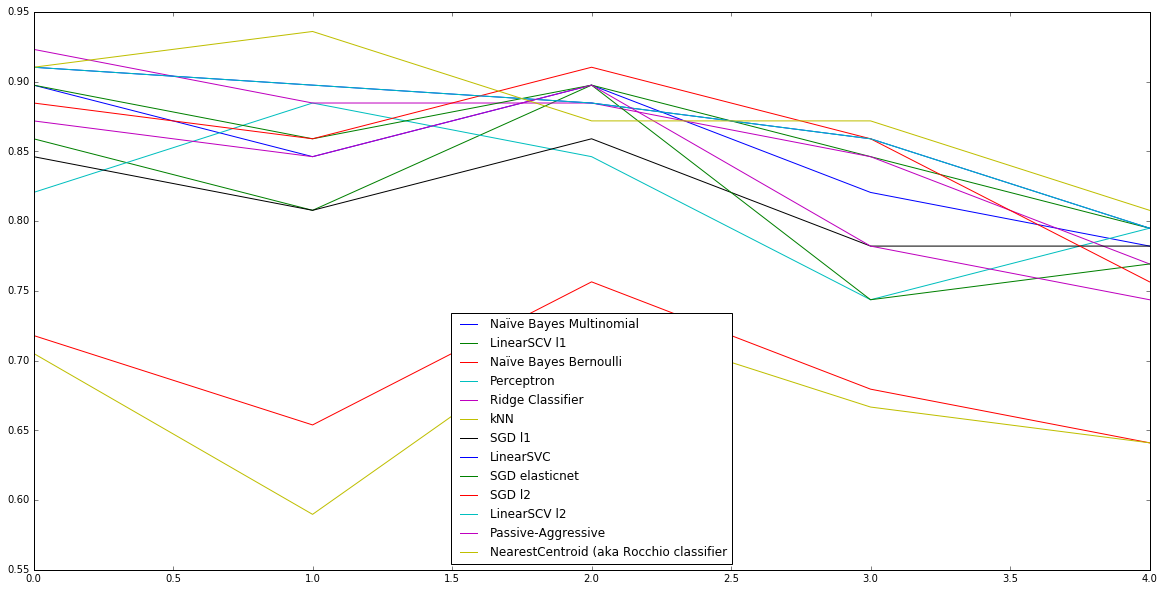

In [10]:
labelled_texts = [(fileid, corpus.raw(fileid)) for fileid in corpus.fileids()]
benchmark_svms(labelled_texts, 5, stoplist_vectorizer)

In [37]:
corpus.fileids()

['1650 1650 - Raleigh Walter Sir 1552-1 - Sir Walter Rawleigh his a.xml.txt',
 '1650 1650 - Taylor John 1580-1653 - A late weary merry voyage.xml.txt',
 '1651 1651 - charles ii roi daposangle - The declaration of Captai.xml.txt',
 '1653 1653 - Pinto Fernäao Mendes d 15 - The voyages and adventure.xml.txt',
 '1655 1655 - Brett Samuel - A narrative of the procee.xml.txt',
 '1655 1655 - Terry Edward 1590-1660 - A voyage to East-India Wh.xml.txt',
 '1656 1656 - Heylyn Peter 1600-1662 - A survey of the estate of.xml.txt',
 '1656 1656 - Heylyn Peter 1600-1662 - Full relation of two jour.xml.txt',
 '1657 1657 - Godwin Francis 1562-1633 - The man in the moone or A.xml.txt',
 '1659 1659 - Burrough Edward 1634-1662 - Visitation and warning pr.xml.txt',
 '1659 1659 - Fowler Robert of the town - A Quakers sea-journal bei.xml.txt',
 '1659 1659 - Hardy Nathaniel 1618-1670 - The pious votary and prud.xml.txt',
 '1660 1660 - Danvers John - The royal oake or An hist.xml.txt',
 '1661 ie 1660 1660 - Paga